In [150]:
from b2heavy.TwoPointFunctions.utils     import correlation_diagnostics
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, plot_effective_coeffs
from b2heavy.TwoPointFunctions.fitter    import StagFitter

import numpy             as np
import gvar              as gv
import matplotlib.pyplot as plt

In the following section, we set all the parameter for the analysis

In [151]:
# Correlator specifics
ENSEMBLE = 'Coarse-1'
MESON    = 'Dsst'
MOMENTUM = '100'

DATA_DIR = '/Users/pietro/code/data_analysis/BtoD/Alex/'

BINSIZE  = 13
SMSLIST  = ['1S-1S','d-d','d-1S']

# Correlation matrix specifics
DIAG   = False
BLOCK  = False
SCALE  = True
SHRINK = True
SVD    = 0.01

# Specifics of the analysis
TRANGE_EFF = (13,19) 
TRANGE     = (5,19)
NSTATES    = 3
WPRIORS    = True
JKFIT      = False

In the following cell, we initialize the objects of `b2heavy` that read the data and format them

In [152]:
io   = CorrelatorIO(ENSEMBLE,MESON,MOMENTUM,PathToDataDir=DATA_DIR)
stag = StagFitter(
    io       = io,
    jkBin    = BINSIZE,
    smearing = SMSLIST
)

We also initialize the instruction to build the covariance matrix

In [153]:
cov_specs = dict(
    diag   = DIAG  ,
    block  = BLOCK ,
    scale  = SCALE ,
    shrink = SHRINK,
    cutsvd = SVD   
)

In the following, we calculate and plot effective mass

In [154]:
effm,effa = stag.meff(TRANGE_EFF,verbose=True,**cov_specs)

Least Square Fit:
  chi2/dof [dof] = 0.43 [42]    Q = 1    logGBF = 199.1

Parameters:
          const   1.15478 (71)      [ 1.1544 (15) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10*,1e-10)    (itns/time = 2/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit:
  chi2/dof [dof] = 0.29 [42]    Q = 1    logGBF = 252.79

Parameters:
('1S-1S', 'Bot')     2.7076 (39)      [   2.7085 (43) ]  
('1S-1S', 'Par')     2.8252 (71)      [   2.8256 (95) ]  
 ('d-1S', 'Bot')    0.28010 (52)      [  0.28016 (96) ]  
 ('d-1S', 'Par')    0.29294 (25)      [  0.29293 (26) ]  
  ('d-d', 'Bot')   0.029148 (28)      [ 0.029143 (29) ]  
  ('d-d', 'Par')   0.030427 (18)      [ 0.030428 (19) ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 3/0.0)
  fitter = scipy_least_squares    method = trf



/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


/Users/pietro/code/software/B2heavy/b2heavy/TwoPointFunctions/types2pts.py:38: RuntimeWarning: invalid value encountered in sqrt
  m = np.arccosh( (y[(it+1)%len(y)]+y[(it-1)%len(y)])/y[it]/2 )


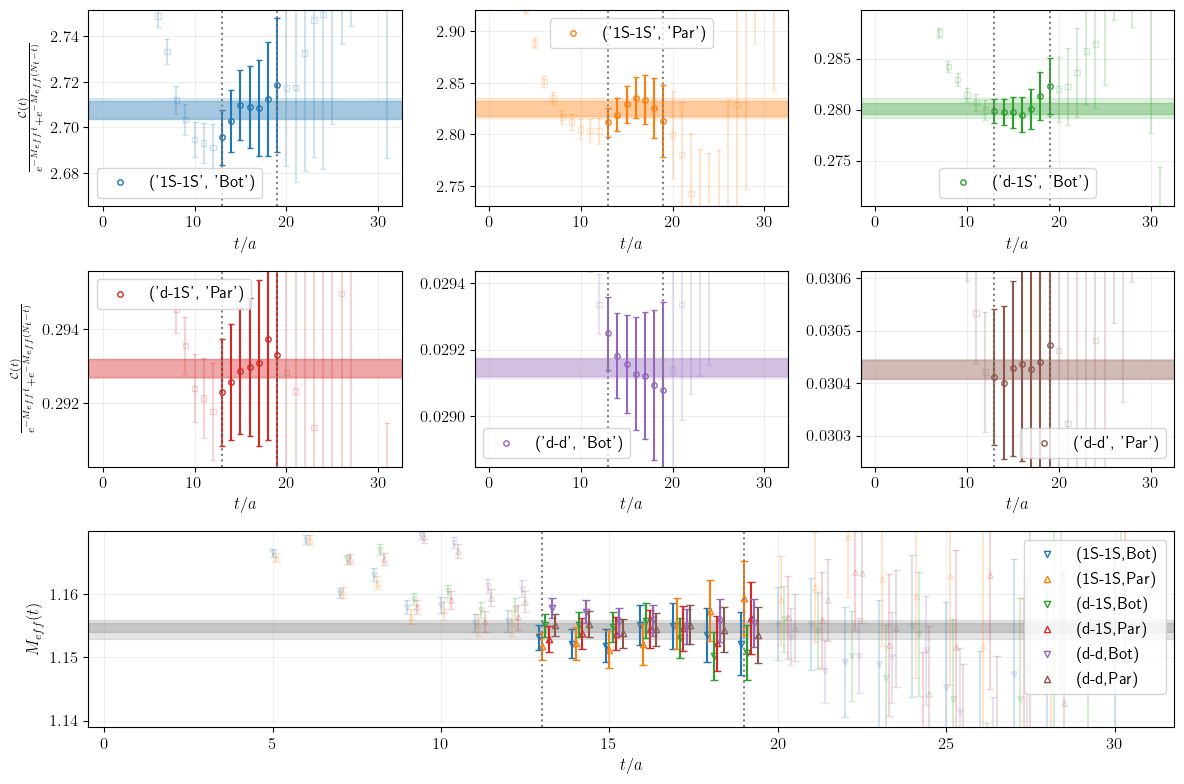

In [155]:
toplot = stag.meff(TRANGE_EFF,**cov_specs,plottable=True)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

plt.figure(figsize=(12, 6 if len(stag.keys)/len(SMSLIST)==1 else 8))
plot_effective_coeffs(TRANGE_EFF,*toplot)

plt.tight_layout()
plt.show()

Here we set priors

In [156]:
priors = stag.priors(NSTATES,Meff=effm,Aeff=effa)

# if you want to change the priors you can do, for example
# priors['E'][0] = gv.gvar('1.007(1)')

priors

{'E': [1.155(27), -1.66(57), -1.1(1.0), -1.1(1.0), -1.1(1.0), -1.1(1.0)],
 'Z_1S_Bot': [0.498(73), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_1S_Par': [0.52(13), -1.2(1.2), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d-1S_Bot': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d-1S_Par': [0.5(1.7), 0.5(1.7), 0.5(1.7), 0.5(1.7)],
 'Z_d_Bot': [-1.768(48), -3.0(1.5), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)],
 'Z_d_Par': [-1.746(30), -5.5(2.0), 0.5(1.5), 0.5(1.5), 0.5(3.0), 0.5(3.0)]}

Now we perform the fit

In [157]:
fit = stag.fit(
    Nstates = NSTATES,
    trange  = TRANGE,
    priors  = priors,
    verbose = True,
    **cov_specs
)

---------- 3+3 fit in (5, 19) for mes: Dsst of ens: Coarse-1 for mom: 100 --------------
Least Square Fit:
  chi2/dof [dof] = 0.49 [90]    Q = 1    logGBF = 1622.3

Parameters:
            E 0   1.1519 (14)     [  1.155 (27) ]  
              1    -3.29 (38)     [  -1.66 (57) ]  **
              2    -1.44 (24)     [  -1.1 (1.0) ]  
              3   -1.509 (93)     [  -1.1 (1.0) ]  
              4    -0.61 (10)     [  -1.1 (1.0) ]  
              5    -0.42 (22)     [  -1.1 (1.0) ]  
     Z_1S_Bot 0    0.462 (13)     [  0.498 (73) ]  
              1    -0.88 (11)     [  -1.2 (1.2) ]  
              2    0.815 (49)     [   0.5 (1.5) ]  
              3    0.959 (78)     [   0.5 (1.5) ]  
              4   0.02 (2.99)     [   0.5 (3.0) ]  
              5     1.86 (64)     [   0.5 (3.0) ]  
     Z_1S_Par 0    0.483 (13)     [   0.52 (13) ]  
              1    -1.15 (12)     [  -1.2 (1.2) ]  
              2    0.780 (76)     [   0.5 (1.5) ]  
              3    0.899 (77)     [   0.5

In [158]:
fitres = stag.fit_result(
    NSTATES,
    TRANGE,
    verbose = True,
    priors  = priors if WPRIORS else None
)

# ---------- 3+3 fit in (5, 19) for mes: Dsst of ens: Coarse-1 for mom: 100 --------------
Least Square Fit:
  chi2/dof [dof] = 0.49 [90]    Q = 1    logGBF = 1622.3

Parameters:
            E 0   1.1519 (14)     [  1.155 (27) ]  
              1    -3.29 (38)     [  -1.66 (57) ]  **
              2    -1.44 (24)     [  -1.1 (1.0) ]  
              3   -1.509 (93)     [  -1.1 (1.0) ]  
              4    -0.61 (10)     [  -1.1 (1.0) ]  
              5    -0.42 (22)     [  -1.1 (1.0) ]  
     Z_1S_Bot 0    0.462 (13)     [  0.498 (73) ]  
              1    -0.88 (11)     [  -1.2 (1.2) ]  
              2    0.815 (49)     [   0.5 (1.5) ]  
              3    0.959 (78)     [   0.5 (1.5) ]  
              4   0.02 (2.99)     [   0.5 (3.0) ]  
              5     1.86 (64)     [   0.5 (3.0) ]  
     Z_1S_Par 0    0.483 (13)     [   0.52 (13) ]  
              1    -1.15 (12)     [  -1.2 (1.2) ]  
              2    0.780 (76)     [   0.5 (1.5) ]  
              3    0.899 (77)     [   0

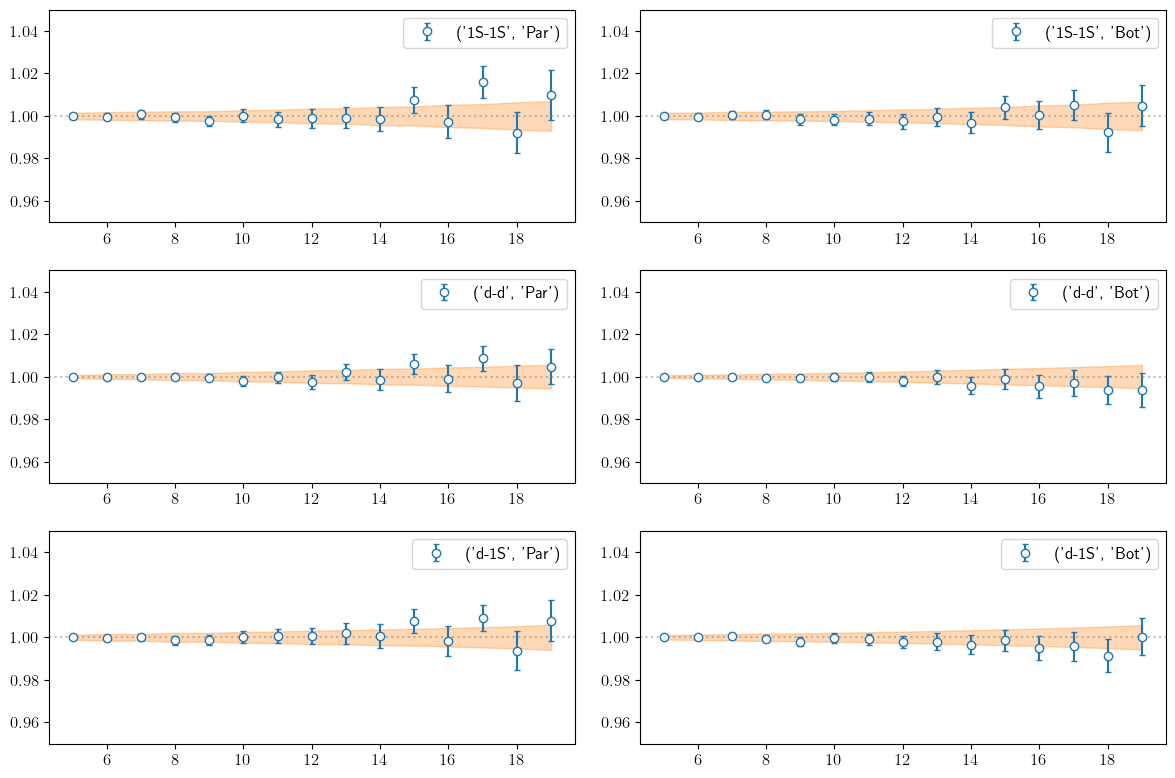

In [159]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12

npol = len(stag.keys)//len(SMSLIST)
f, ax = plt.subplots(3,npol,figsize=(12,8))
stag.plot_fit(ax,NSTATES,TRANGE)

plt.tight_layout()